In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as ppl
%matplotlib inline
import os

Using TensorFlow backend.


In [10]:
#os.getcwd()
os.chdir('/Users//Documents/04 Python Stuff/02 Neural Network Learning')

In [11]:
#Read in the input data into numpy arrays (takes a minute or two)
from numpy import genfromtxt
mnist_train_raw = genfromtxt('mnist_train.csv', delimiter=',')
mnist_test_raw = genfromtxt('mnist_test.csv', delimiter=',')

#add the test and training data sets together since you don't need a test set for unsupervised
mnist_total_raw = np.vstack((mnist_train_raw, mnist_test_raw))

In [12]:
NUMBER = 5  #this is the digit that you'll train your model on

#pick only the records that are images of the number you want to train on
#just comment out this step if you want to train on all 10 digits at once
mnist_total_fives = mnist_total_raw[mnist_total_raw[:,0]==NUMBER]

#mnist_total_fives = mnist_total_raw
print(mnist_total_fives.shape)  #6313 fives in the list

#the first column in the array is the label of the image
mnist_fives_labels = mnist_total_fives[:,0]
mnist_fives_features = mnist_total_fives[:,1:]
mnist_fives_features = (mnist_fives_features / 127.5) - 1.0

print(mnist_fives_features.shape)

(6313, 785)
(6313, 784)


In [13]:
#build the gan
#first import all the shit from Keras

from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import initializers

#we will feed in a vector with 100 (or however many we want) elements of random noise
noise_dim = 100

In [15]:
#generator
#del gen
gen = Sequential()
gen.add(Dense(128, activation = 'relu', input_shape = (noise_dim,), kernel_initializer= 'he_normal'))
gen.add(Dropout(0.05))  #dropout helps a little, but also trains a little slower
gen.add(Dense(784, activation = 'tanh', kernel_initializer= 'he_normal'))
gen.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [16]:
#discriminator
#del dis
dis = Sequential()
dis.add(Dense(128, activation= 'relu', input_shape = (784,),kernel_initializer= 'he_normal'))
#dis.add(Dense(128, activation= 'selu',kernel_initializer= 'he_normal'))
dis.add(Dense(1, activation = 'sigmoid', kernel_initializer= 'he_normal'))
dis.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [17]:
#combined network
#del gan
dis.trainable = False
ganInput = Input(shape=(noise_dim,))
x = gen(ganInput)
ganOutput = dis(x)
gan = Model(inputs = ganInput, outputs = ganOutput)
gan.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
#plot the generated images

def plotGeneratedImages(examples=100, dim=(10, 10), figsize=(9, 9)):
    
    noise = np.random.normal(0, 1, size=[examples, noise_dim])
    generatedImages = gen.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    ppl.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        ppl.subplot(dim[0], dim[1], i+1)
        ppl.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        ppl.axis('off')
    ppl.tight_layout()

In [19]:
def plotLosses():
    ppl.figure(figsize=(15, 8))
    ppl.plot(DisLossHist, label='Discriminitive loss')
    ppl.plot(GenLossHist, label='Generative loss')
    

In [20]:
#initialize a couple of lists to store the losses of the generator and discriminator (useful for plotting)
DisLossHist = []
GenLossHist = []

In [21]:
def train(epochs = 1, batchSize = 128):
    
    batchCount = int(mnist_fives_features.shape[0]/batchSize)
    
    np.random.shuffle(mnist_fives_features)
    
    for e in range(epochs):
        if e % 2 ==0:
            print("epoch ", e)
        for b in range(batchCount):
            #if b % 20 == 0:
            #    print("step ",b)
            
            #first pass through the loop, b is 0!
            noise = np.random.normal(0,1,size = [batchSize,noise_dim])
            imageBatch = mnist_fives_features[b*batchSize:(b+1)*batchSize,:]

            #generate fake images
            generatedImages = gen.predict(noise)
            
            #append a batch of real images to fake images
            discriminatorInputs = np.vstack((imageBatch, generatedImages))
            
            #create labels for the disciminator inputs
            yDis = np.zeros(2*batchSize)
            yDis[:batchSize] = 0.9
            
            #train Discriminator
            dis.trainable = True
            dLoss = dis.train_on_batch(discriminatorInputs, yDis)
            
            #train Generator
            dis.trainable = False
            yGen = np.ones(batchSize)
            gLoss = gan.train_on_batch(noise, yGen)
            
        DisLossHist.append(dLoss)
        GenLossHist.append(gLoss)
    print("Done")


In [25]:
%%time
train(epochs = 100, batchSize = 128)

epoch  0
epoch  2
epoch  4
epoch  6
epoch  8
epoch  10
epoch  12
epoch  14
epoch  16
epoch  18
epoch  20
epoch  22
epoch  24
epoch  26
epoch  28
epoch  30
epoch  32
epoch  34
epoch  36
epoch  38
epoch  40
epoch  42
epoch  44
epoch  46
epoch  48
epoch  50
epoch  52
epoch  54
epoch  56
epoch  58
epoch  60
epoch  62
epoch  64
epoch  66
epoch  68
epoch  70
epoch  72
epoch  74
epoch  76
epoch  78
epoch  80
epoch  82
epoch  84
epoch  86
epoch  88
epoch  90
epoch  92
epoch  94
epoch  96
epoch  98
Done
CPU times: user 3min 33s, sys: 21.5 s, total: 3min 55s
Wall time: 1min 33s


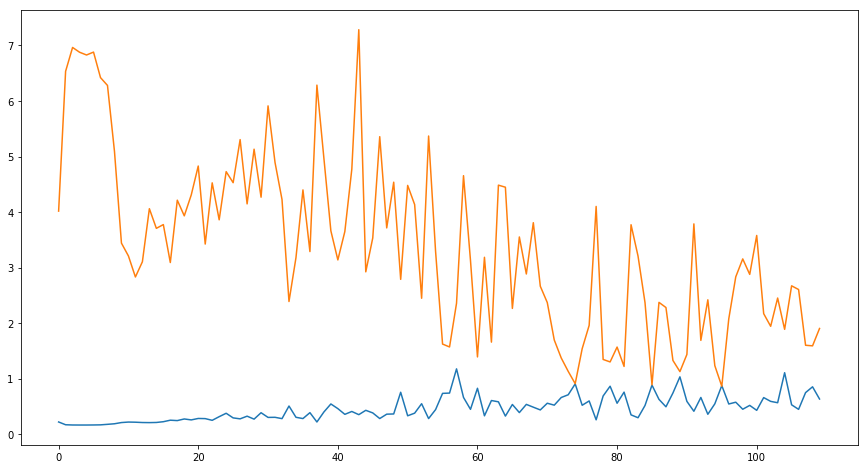

In [26]:
plotLosses()

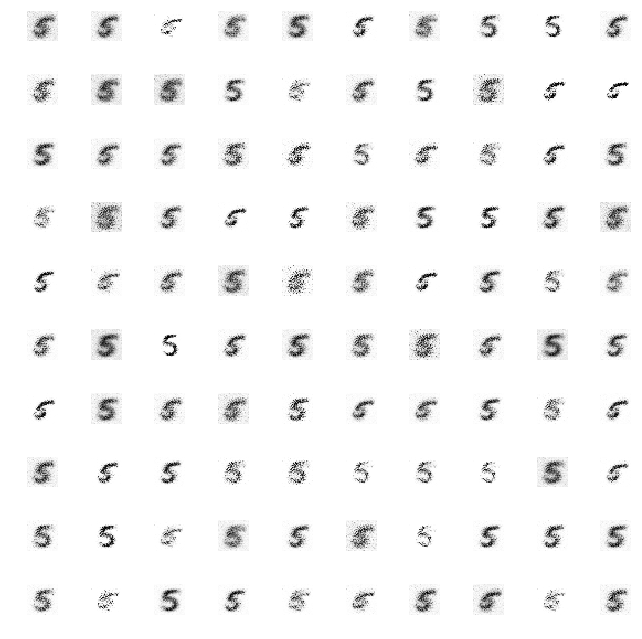

In [27]:
plotGeneratedImages()

In [ ]:
def saveModels():
    gen.save('gan_generator_twos.h5')
    dis.save('dis_generator_twos.h5')

saveModels()